In [1]:
from google.colab import drive
drive.mount('/content/drive')   #mounting the google drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#importing the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df = pd.read_csv('/content/drive/MyDrive/MY PROJECTS FOR GITHUB UPLOAD/diabetes-2.csv') #reading the dataset which is in CSV 

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.head() #describes the head of the data through the keyword head

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.describe()  #The mean represents a feature's average, whereas the median represents the middle number when the collection is ordered.
#The mean is near to the median (50%) in the first four characteristics and the last one, indicating that the distribution is roughly symmetric and normally distributed.


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.info() #gives the information of the datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.shape #gives the tuple of array dimensions that tells the number of rows and columns of a given DataFrame.

(768, 9)

In [9]:
df.value_counts() #The function returns a Series having counts of distinct values.

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

In [10]:
df.dtypes #describes the datatype 

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [11]:
df.isnull().sum() #calculate the sum of each value row and column.As per the given data thier is no null value. 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
df.corr() # finds the correlation of each column in a DataFrame.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


# **DATA VISULIZATION**

<Axes: >

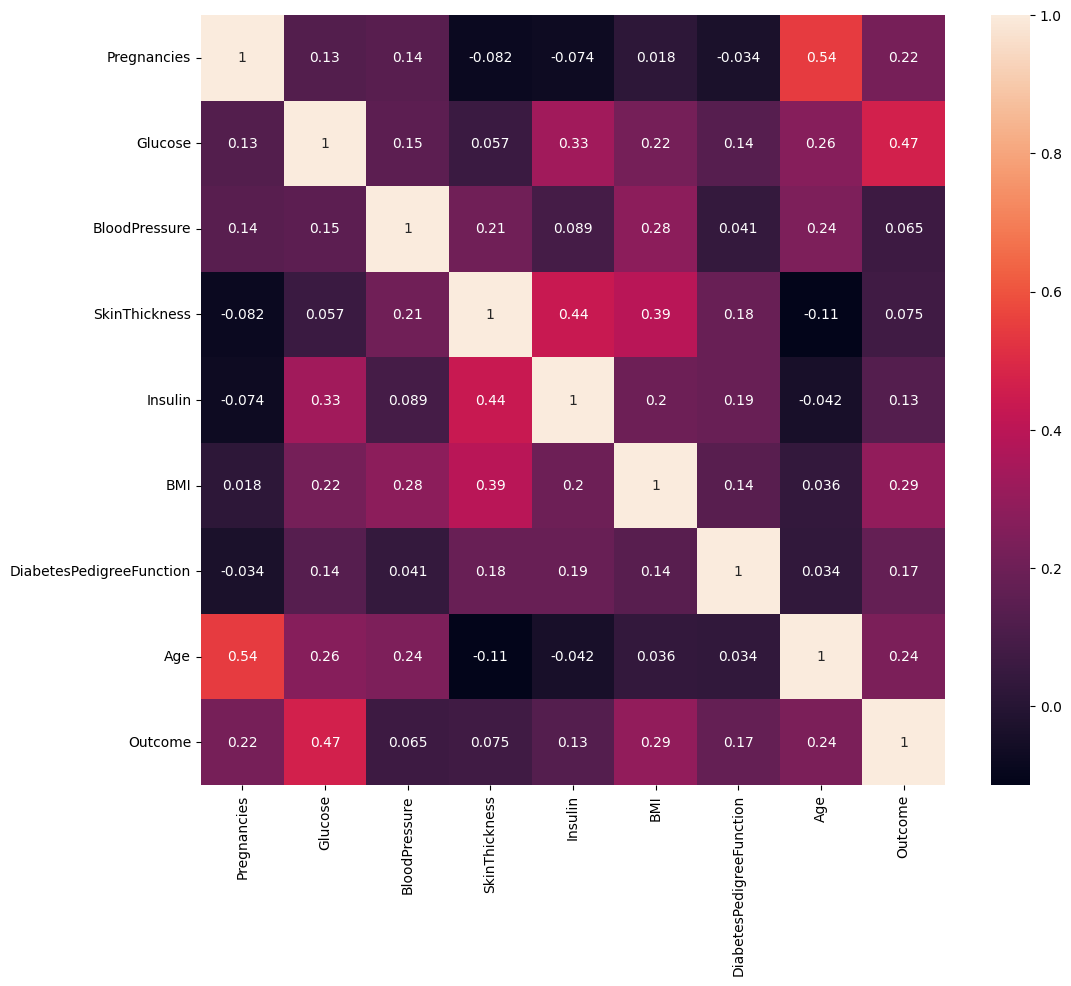

In [13]:
plt.figure(figsize = (12,10))

sns.heatmap(df.corr(), annot =True)  #DESCRIBES the heatmap and correlation of the dataset. 

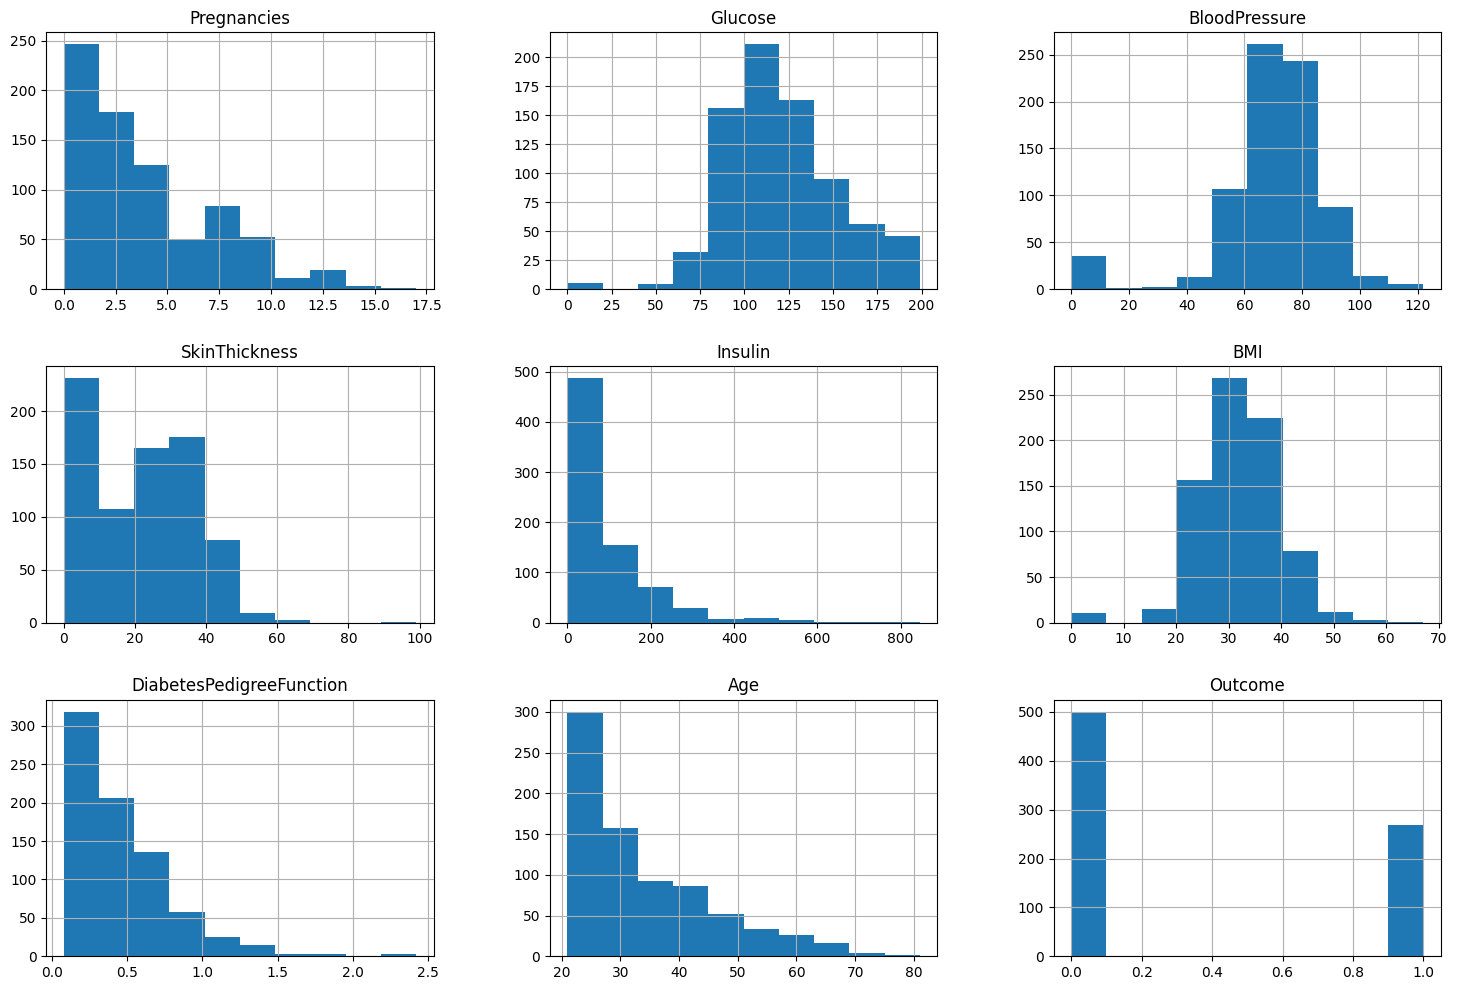

In [14]:
df.hist(figsize=(18,12))
plt.show()      #describes thehistogram grapg for each each column

<Axes: xlabel='SkinThickness'>

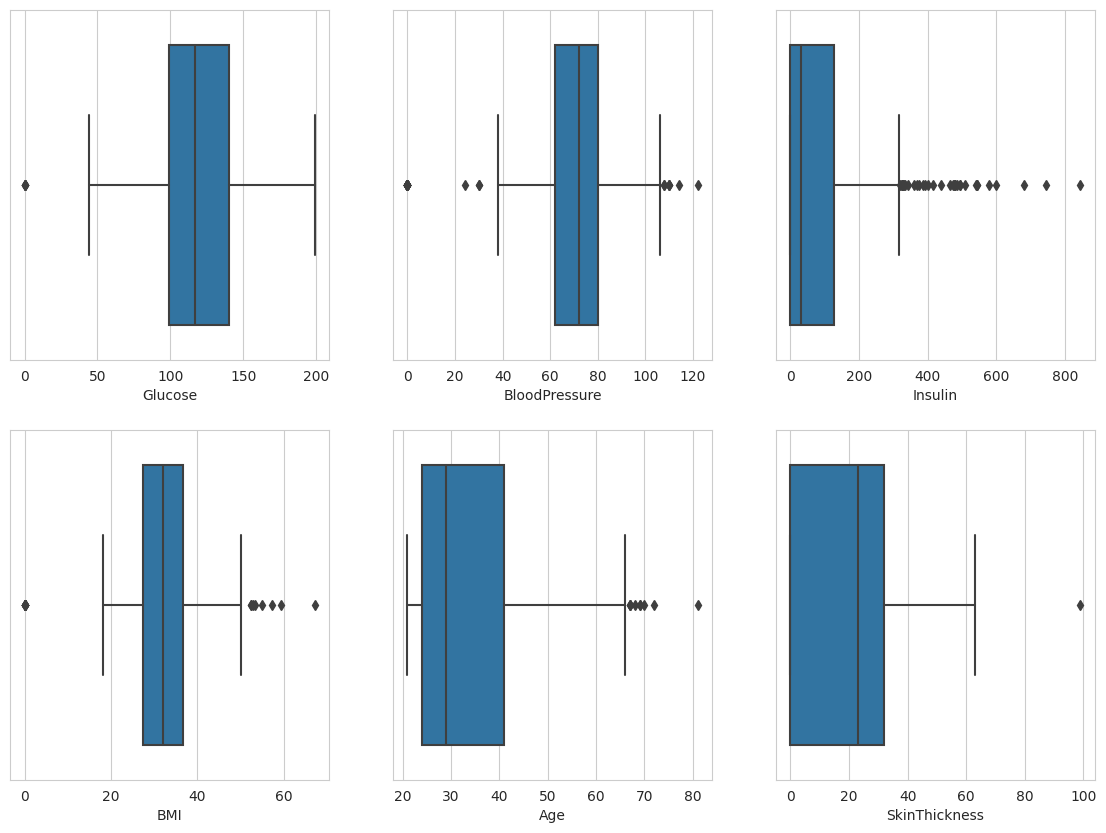

In [15]:
#describes the boxplot graph for each attribute of dataset
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(2,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(2,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(2,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(2,3,6)
sns.boxplot(x='SkinThickness',data=df)

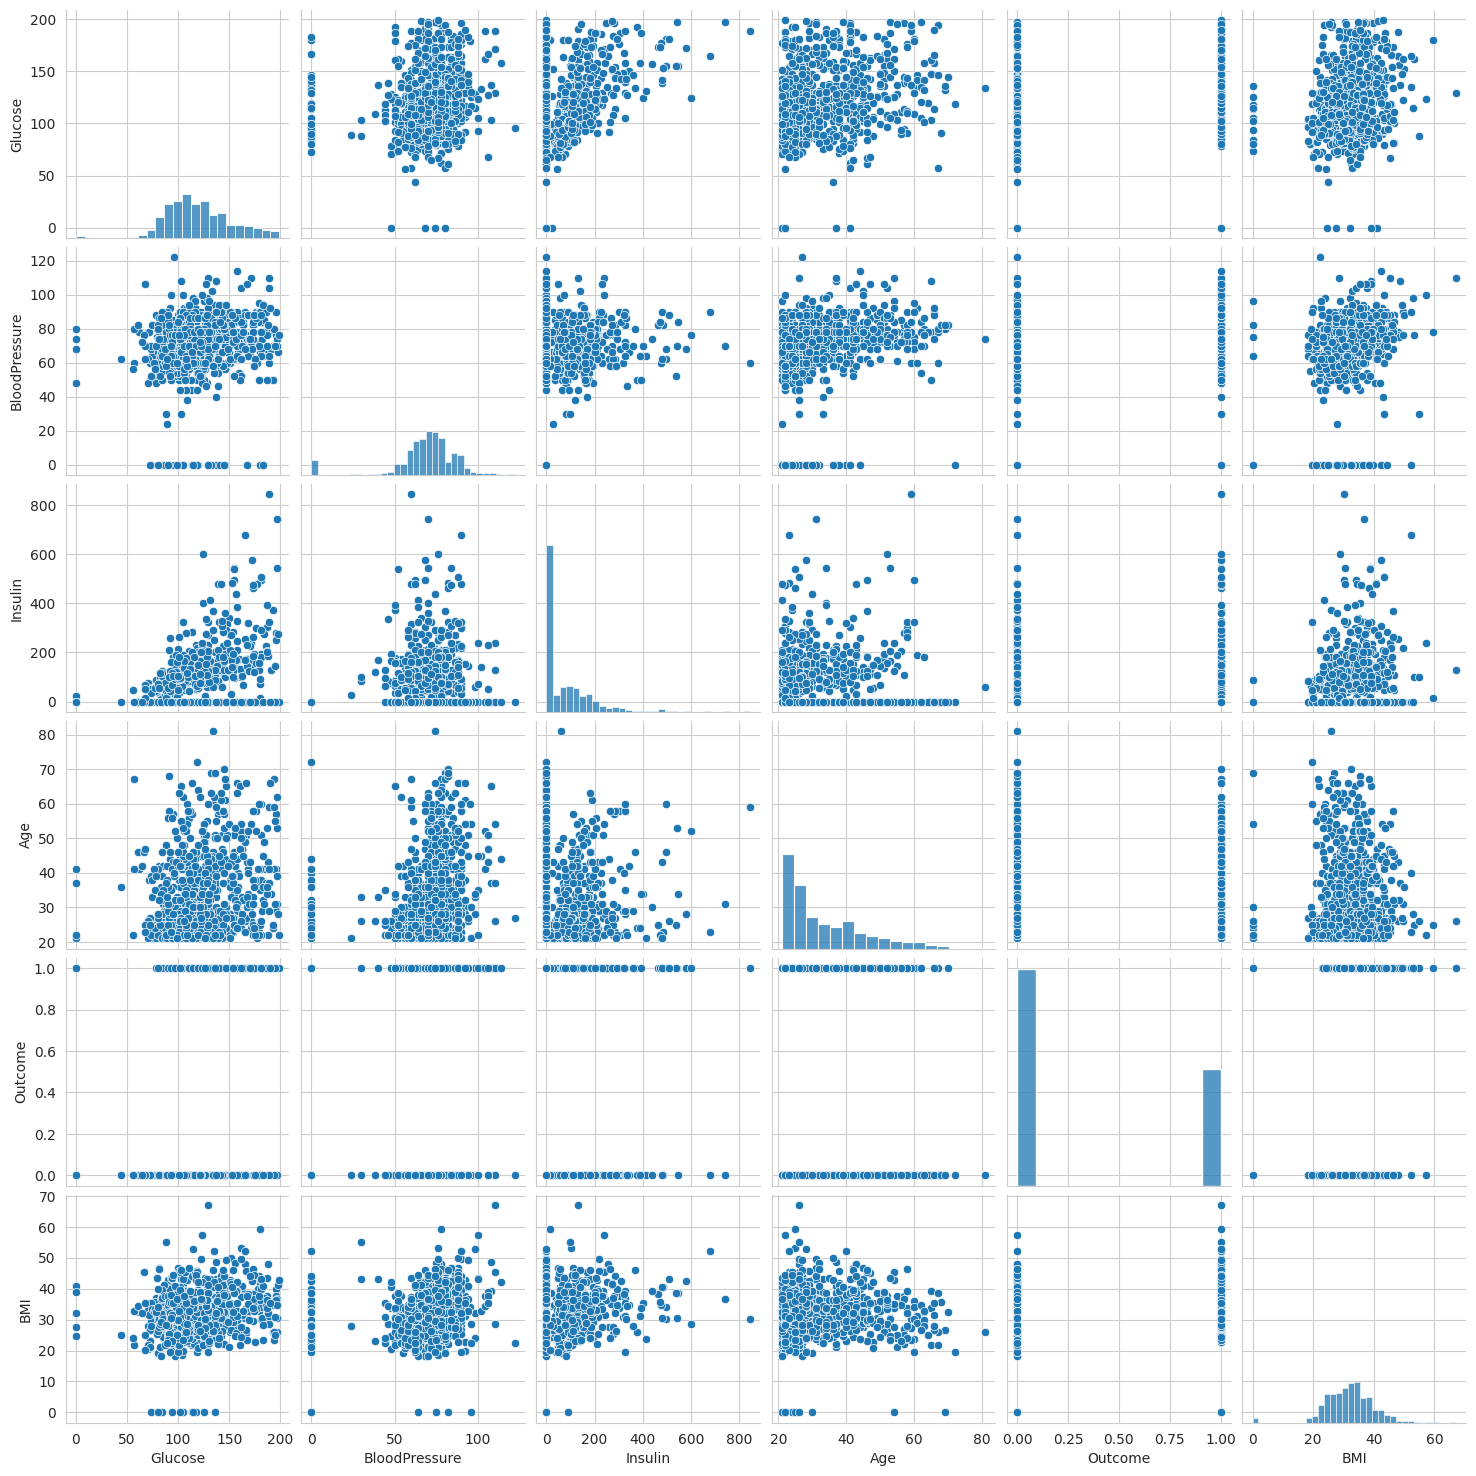

In [16]:
#pairplot graph for the each column
mean_col = ['Glucose','BloodPressure','Insulin','Age','Outcome','BMI']

sns.pairplot(df[mean_col],palette='Accent')

<Axes: xlabel='Outcome', ylabel='Insulin'>

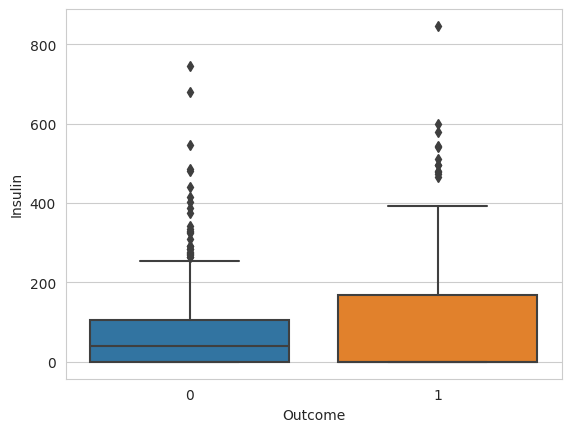

In [17]:
#comparison to see the outome v/s insulin graph in boxplot can infere that as the insulin level is high their is chances of getting diabetes 
sns.boxplot(x='Outcome',y='Insulin',data=df)

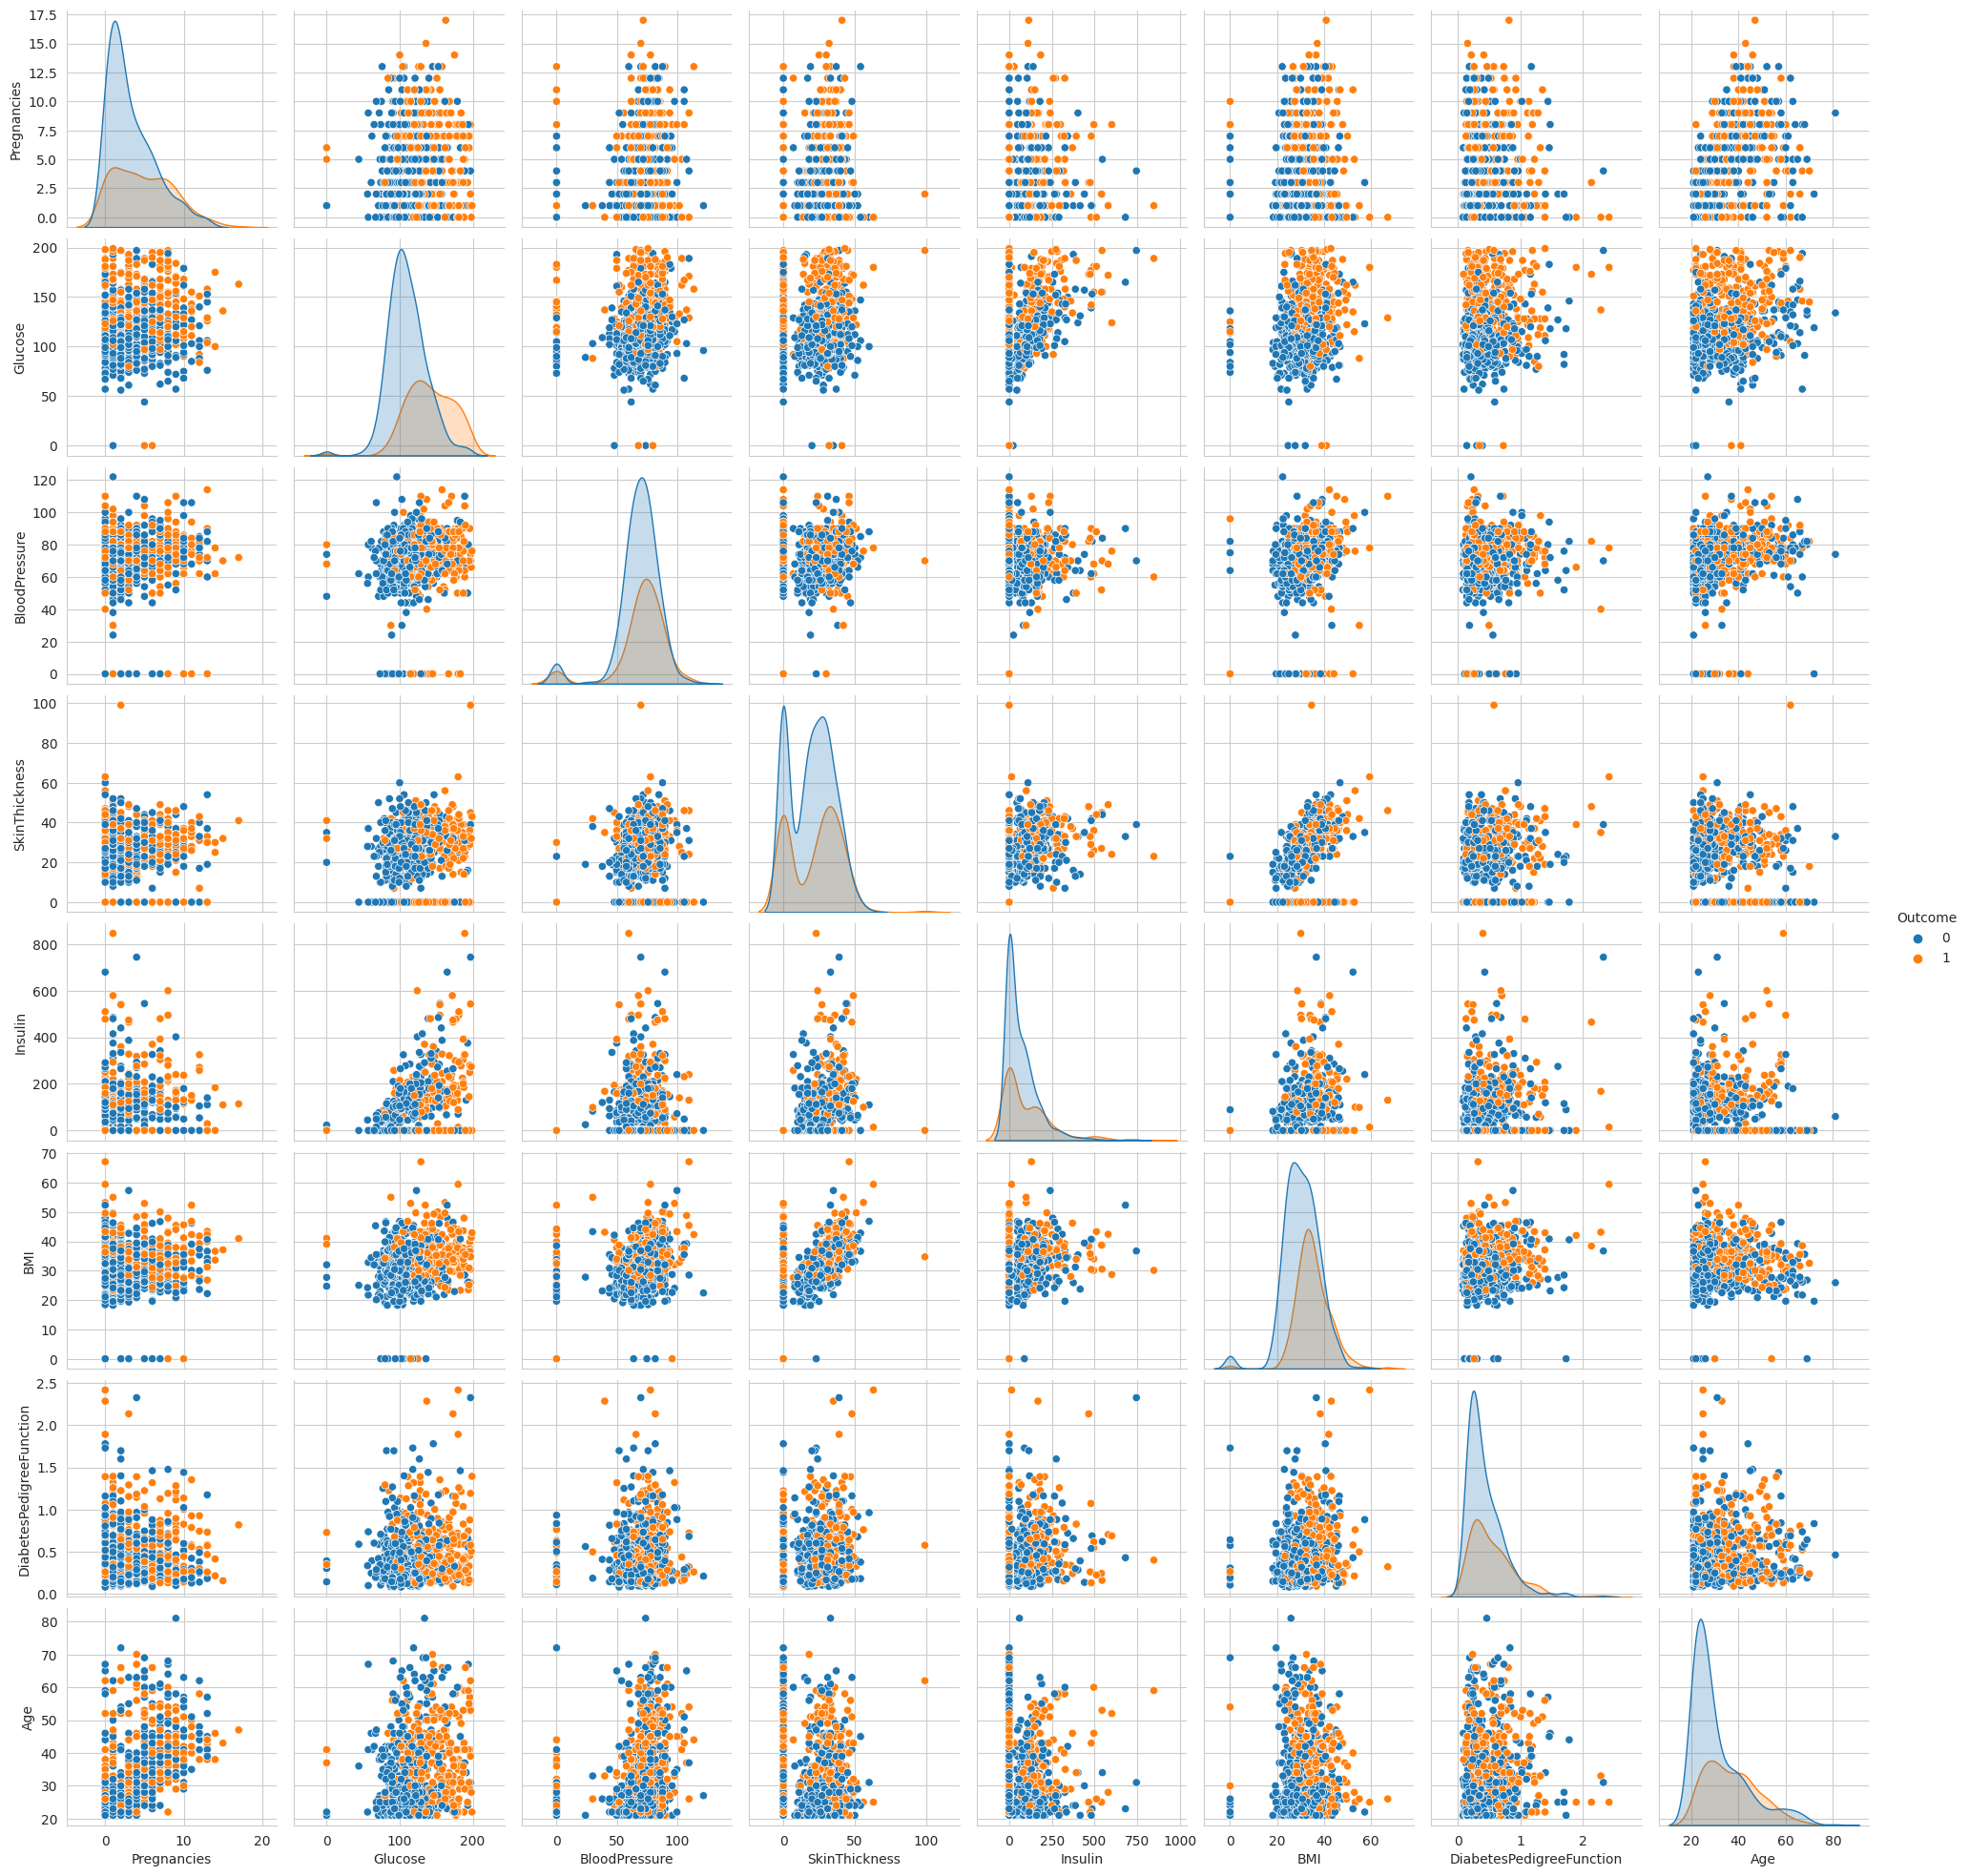

In [18]:
sns.pairplot(df,hue='Outcome') #pairplot graph to compare with outcome column

<Axes: xlabel='Glucose', ylabel='Insulin'>

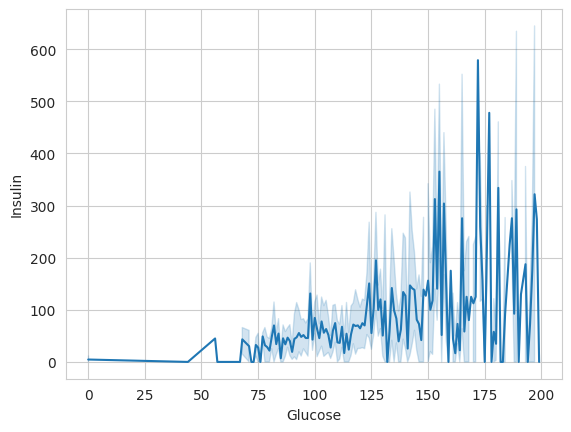

In [19]:
sns.lineplot(x='Glucose', y= 'Insulin', data=df) #lineplot graph for glucose v/s insulin can infer that as the glucose level is high even the insulin level is also high 

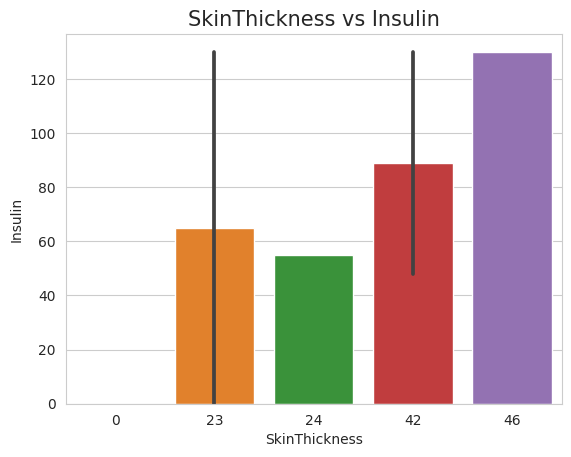

In [20]:
sns.barplot(x="SkinThickness", y="Insulin", data=df[170:180])
plt.title("SkinThickness vs Insulin",fontsize=15)
plt.xlabel("SkinThickness")
plt.ylabel("Insulin")
plt.show()
plt.style.use("ggplot")
#bar graph for the skin thickness v/s insulin. As the thickness is high even insulin level is also high 

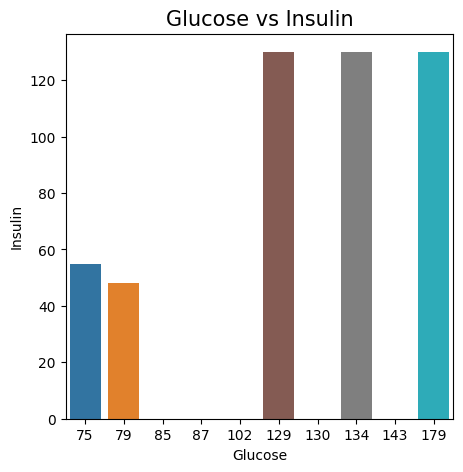

In [21]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Glucose", y="Insulin", data=df[170:180])
plt.title("Glucose vs Insulin",fontsize=15)
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.show()
#bargraph for insulin v/s glucose. As the glucose increase even insulin level also increases. 

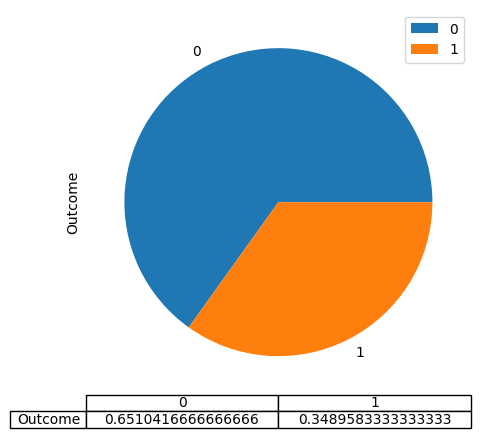

In [22]:
df["Outcome"].value_counts(normalize=True).plot(kind="pie", legend=True, table=True, figsize=(5,5)); #pairplot for the outcome to know the percentage of diabetic or not 

In [45]:
no_diab= df[df['Outcome']==0]
diab= df[df['Outcome']==1]

Text(0.5, 1.0, 'BMI distribution of non diabetic and Diabetic')

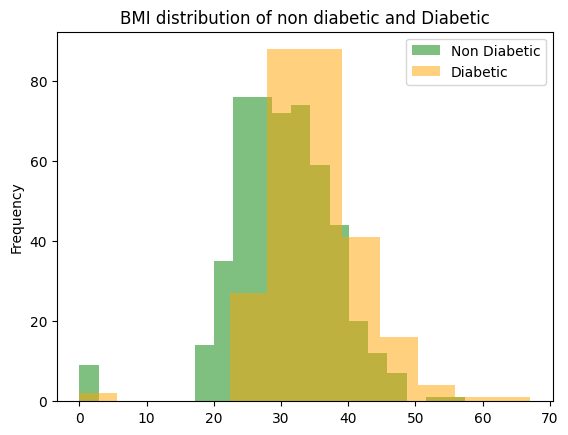

In [46]:
ax = no_diab['BMI'].plot.hist(bins=20, alpha=0.5,color="green")   #BMI distribution of non diabetic and Diabetic through histrogram plot
ax = diab['BMI'].plot.hist(bins=12, alpha=0.5,color="orange")
plt.legend(["Non Diabetic", "Diabetic"])
plt.title("BMI distribution of non diabetic and Diabetic")

Text(0.5, 1.0, 'Age distribution of non diabetic and Diabetic')

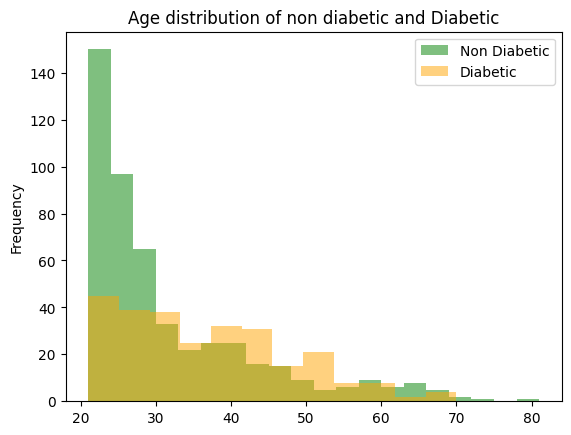

In [47]:
ax = no_diab['Age'].plot.hist(bins=20, alpha=0.5,color="green") #Age distribution of non diabetic and Diabetic through histrogram plot 
ax = diab['Age'].plot.hist(bins=12, alpha=0.5,color="orange")
plt.legend(["Non Diabetic", "Diabetic"])
plt.title("Age distribution of non diabetic and Diabetic")

Text(0.5, 1.0, 'BloodPressure distribution of non diabetic and Diabetic')

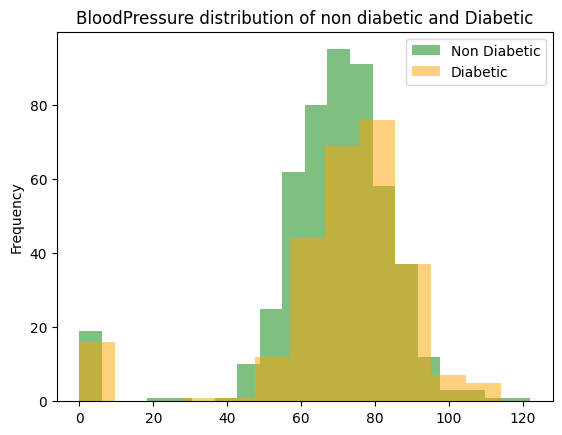

In [48]:
ax = no_diab['BloodPressure'].plot.hist(bins=20, alpha=0.5,color="green")    #BloodPressure distribution of non diabetic and Diabetic through histrogram plot
ax = diab['BloodPressure'].plot.hist(bins=12, alpha=0.5,color="orange")
plt.legend(["Non Diabetic", "Diabetic"])
plt.title("BloodPressure distribution of non diabetic and Diabetic")

#DATA SPLITING 

In [23]:
#train_test_splitting of the dataset

x = df.drop(columns = 'Outcome')

# Getting Predicting Value
y = df['Outcome']

from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [24]:
#to printt the length of the data split sets. 
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

537
231
537
231


In [25]:
#importing important libraries
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
import numpy

In [26]:
df = pd.read_csv('/content/drive/MyDrive/MY PROJECTS FOR GITHUB UPLOAD/diabetes-2.csv') #reads the data set

In [27]:
#choosing X and y
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [28]:
# #scaling the data
from sklearn.preprocessing import scale
X = scale(X)

In [29]:
from sklearn.model_selection import train_test_split
# from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
#
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)

#SEQUENTIAL MODEL


In [31]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [32]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
# training model
model.fit(X_train, y_train, epochs=25, batch_size=10)

Epoch 1/25
52/52 [==============================] - 1s 3ms/step - loss: 0.7463 - accuracy: 0.4241
Epoch 2/25
52/52 [==============================] - 0s 3ms/step - loss: 0.7038 - accuracy: 0.6128
Epoch 3/25
52/52 [==============================] - 0s 3ms/step - loss: 0.6863 - accuracy: 0.6673
Epoch 4/25
52/52 [==============================] - 0s 3ms/step - loss: 0.6749 - accuracy: 0.7062
Epoch 5/25
52/52 [==============================] - 0s 3ms/step - loss: 0.6652 - accuracy: 0.7335
Epoch 6/25
52/52 [==============================] - 0s 3ms/step - loss: 0.6549 - accuracy: 0.7412
Epoch 7/25
52/52 [==============================] - 0s 3ms/step - loss: 0.6437 - accuracy: 0.7529
Epoch 8/25
52/52 [==============================] - 0s 3ms/step - loss: 0.6327 - accuracy: 0.7665
Epoch 9/25
52/52 [==============================] - 0s 3ms/step - loss: 0.6200 - accuracy: 0.7607
Epoch 10/25
52/52 [==============================] - 0s 3ms/step - loss: 0.6091 - accuracy: 0.7626
Epoch 11/25
52/52 [

In [34]:
#prediction and evalution
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print(y_pred.shape)
y_pred = np.argmax(y_pred, axis=1)
accuracy_score(y_test, y_pred)

8/8 [==============================] - 0s 2ms/step
(254, 2)


0.7795275590551181

In [35]:
y_pred.shape

(254,)

17/17 [==============================] - 0s 2ms/step - loss: 0.5155 - accuracy: 0.7821


Text(0, 0.5, 'loss')

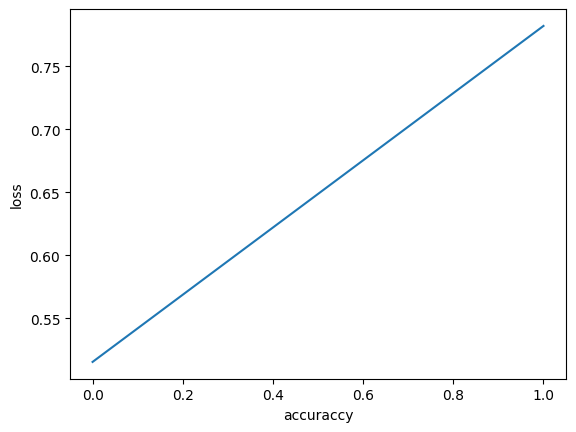

In [36]:
#plotting loss against no. of epochs
import matplotlib.pyplot as plt
plt.plot(model.evaluate(X_train, y_train))
plt.xlabel('accuraccy')
plt.ylabel('loss')

#MLP MODEL


In [37]:
from sklearn.neural_network import MLPClassifier #importing the mlp package  
mlp=MLPClassifier(random_state=45)

mlp.fit(X_train, y_train)      #building the model



print(mlp.score(X_train, y_train))  #score for the mlp model


0.8190661478599222


In [38]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# cm = confusion_matrix(X_train, y_train)
  

In [39]:
y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
# y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)


# y_pred = model.predict(X_test)
# print(y_pred.shape)
# y_pred = np.argmax(y_pred, axis=1)
# accuracy_score(y_test, y_pred)
# print(accuracy_score)
# cm = confusion_matrix(y_test, y_pred)
# print(cm)

8/8 [==============================] - 0s 2ms/step
[[145  23]
 [ 33  53]]


In [40]:
#prediction and evalution
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

y_pred = model.predict(X_test)
print(y_pred.shape)
y_pred = np.argmax(y_pred, axis=1)
accuracy_score(y_test, y_pred)
print(accuracy_score)
cm = confusion_matrix(y_test, y_pred)
print(cm)

8/8 [==============================] - 0s 2ms/step
(254, 2)
<function accuracy_score at 0x7f3c9cca20d0>
[[145  23]
 [ 33  53]]


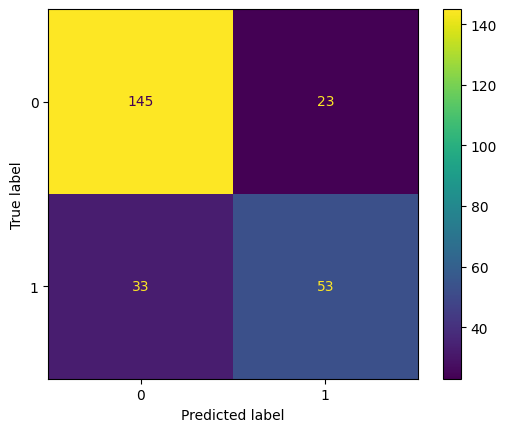

In [41]:
CMD= ConfusionMatrixDisplay(confusion_matrix = cm)
CMD.plot()
plt.show()

In [42]:
# from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# cm = confusion_matrix(X_train, y_train)
  

In [43]:
# cm= confusion_matrix(X_train, y_train)
# CMD= ConfusionMatrixDisplay(confusion_matrix = cm)
# CMD.plot()
# plt.show()

In [44]:
# #plotting loss against no. of epochs
# import matplotlib.pyplot as plt
# plt.plot(mlp.score(X_train, y_train))
# plt.xlabel('accuraccy')
# plt.ylabel('loss')